# Ensemble/Voting Classification in Python with Scikit-Learn
ref：https://www.kaggle.com/c/titanic/submit

In [11]:
import pandas as pd
import numpy as np
import warnings

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, log_loss
from sklearn.model_selection import train_test_split, KFold, cross_val_score

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier

## 1. read csv

In [2]:
training_data = pd.read_csv("data/train.csv")
testing_data = pd.read_csv("data/test.csv")
training_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. get nulls

In [142]:
#SKIP Teacher's version
def get_nulls(training, testing):
     print("training Data:")
     print(pd.isnull(training).sum())     
     print("Testing Data:")
     print(pd.isnull(testing).sum())
get_nulls(training_data, testing_data)

training Data:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Testing Data:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


### (1)def na_list_count(): ivy function to list variables with NA and graph it

['Age', 'Cabin', 'Embarked']
['Age', 'Fare', 'Cabin']


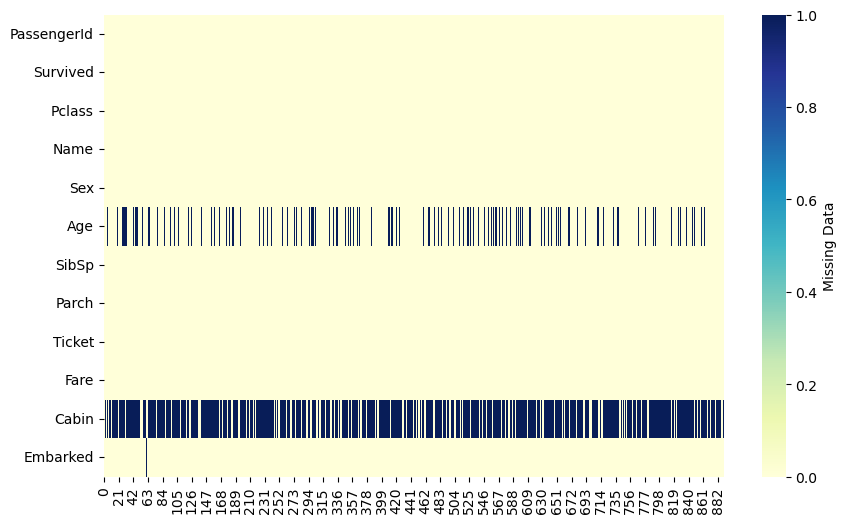

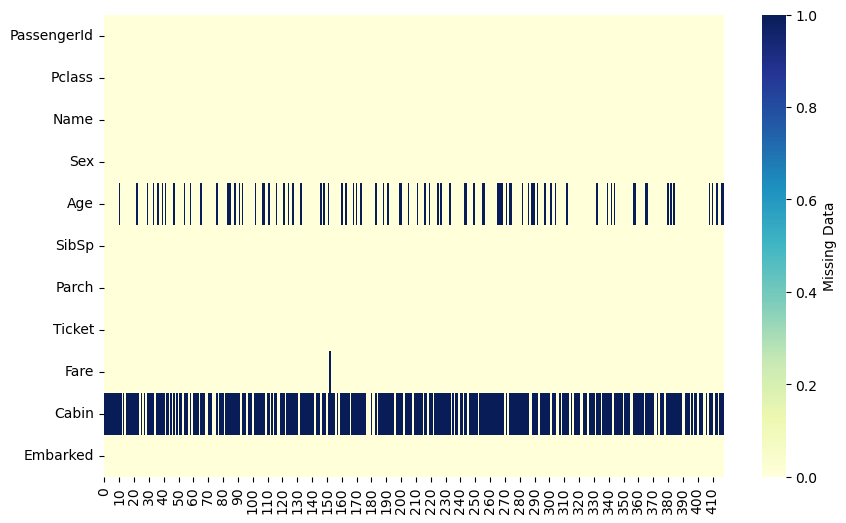

In [3]:
#Ivy: na
def na_list_count():
    for data in [training_data, testing_data]:  
        NA_list = []
        NA_list = [elem for i,elem in enumerate(data.columns) if data[elem].isna().sum(axis=0)> 0]
        if NA_list == []:
            print("No NA")
        else:
            print(NA_list)
            plt.figure(figsize=(10,6))
            sns.heatmap(data.isna().transpose(),
                        cmap="YlGnBu",
                        cbar_kws={'label': 'Missing Data'})
na_list_count()

### (2) drop variables not needed and replace missing value
#### def new_value(): ivy function to replace variable's value
####    

In [4]:
#Ivy's version
# Drop the cabin column, as there are too many missing values
# Drop the ticket numbers too, as there are too many categories
# Drop names as they won't really help predict survivors
#print(T_list[0])
#print('before:', training_data.columns)
#training_data.drop(T_list[0], axis = 1, inplace= True)
#print('after:', training_data.columns)

v_to_drop = ["Cabin","Ticket","Name", "PassengerId"]
for data in  [training_data, testing_data]:
    print('before:',    data.columns)
    data.drop(v_to_drop, axis = 1, inplace = True)
    print('after:',   data.columns)
 

# Taking the mean/average value would be impacted by the skew
# so we should use the median value to impute missing values
# age: median, Embarked: 'S', Fare: median
def new_value(data):
    New_value_list = {'Age': data['Age'].median(),\
                        'Embarked': 'S',\
                        'Fare': data['Fare'].median() }
    data.fillna(value=New_value_list,inplace = True)    

new_value(training_data)
new_value(testing_data)

print(na_list_count())

before: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
after: Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')
before: Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
after: Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')
No NA
No NA
None


## 3. Onehot encoder and standardization

### (1) Onehot encoder: Sex and Embarked

In [195]:
#Skip Teacher's version
# Fit the encoder on the data (Feature: Sex)
encoder_1 = LabelEncoder()
encoder_1.fit(training_data["Sex"])

# Transform and replace training data
training_sex_encoded = encoder_1.transform(training_data["Sex"])
training_data["Sex"] = training_sex_encoded
test_sex_encoded = encoder_1.transform(testing_data["Sex"])
testing_data["Sex"] = test_sex_encoded

# Fit the encoder on the data (Feature: Embarked)
 

In [5]:
#Ivy's version

#1 OneHot function: Ivy_onehot(data, variable)
def Ivy_onehot(data,v):
    encoder_1 = LabelEncoder()
    # Fit the encoder on the data 
    encoder_1.fit(data[v])
    # Transform and replace training data
    training_v_encoded = encoder_1.transform(data[v])
    data[v] = training_v_encoded

#2 data and variables: training_data/testing_data; Sex and Embarked
Data = [training_data, testing_data]
Variable = ['Sex', 'Embarked']

for D in Data:
    for V in Variable:
        Ivy_onehot(D,V)
        print(D[V].value_counts())


1    577
0    314
Name: Sex, dtype: int64
2    646
0    168
1     77
Name: Embarked, dtype: int64
1    266
0    152
Name: Sex, dtype: int64
2    270
0    102
1     46
Name: Embarked, dtype: int64


### 2. Standardization
#### (1) from sklearn.preprocessing import StandardScaler
#### (2) turn pd.variable to ndarray of 2 dimension 

In [6]:
#Ivy's version
Data = [training_data, testing_data]
Variable = ['Age', 'Fare']

def Ivy_std(data,v):
    # Scaler function
    scaler = StandardScaler()
    
    # Any value we want to reshape needs be turned into array first
    nd_v = np.array(data[v]).reshape(-1,1)
 
    #replace the variable with the standardized one
    data[v] = scaler.fit_transform(nd_v)

for D in Data:
    for V in Variable:
        Ivy_std(D,V)
    print(D)
    
 

     Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0           0       3    1 -0.565736      1      0 -0.502445         2
1           1       1    0  0.663861      1      0  0.786845         0
2           1       3    0 -0.258337      0      0 -0.488854         2
3           1       1    0  0.433312      1      0  0.420730         2
4           0       3    1  0.433312      0      0 -0.486337         2
..        ...     ...  ...       ...    ...    ...       ...       ...
886         0       2    1 -0.181487      0      0 -0.386671         2
887         1       1    0 -0.796286      0      0 -0.044381         2
888         0       3    0 -0.104637      1      2 -0.176263         2
889         1       1    1 -0.258337      0      0 -0.044381         0
890         0       3    1  0.202762      0      0 -0.492378         1

[891 rows x 8 columns]
     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    1  0.386231      0      0 -0.497413         1
1 

In [ ]:
#SKIP Teacher's version
# Now to select our training/testing data
X_features = training_data.drop(labels=['PassengerId', 'Survived'], axis=1)
y_labels = training_data['Survived']

print(X_features.head(5))
print(y_labels.head(5))

# Make the train/test data from validation

X_train, X_val, y_train, y_val = train_test_split(X_features, y_labels, test_size=0.1,random_state=12)

In [7]:
#Ivy's version

# Now to select our training/testing data
X_features = training_data.drop(labels=['Survived'], axis=1)
y_labels = training_data['Survived']

print(X_features.head(5))
print(y_labels.head(5))

# Make the train/test data from validation

X_train, X_val, y_train, y_val = train_test_split(X_features, y_labels, test_size=0.1,random_state=12)

   Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0       3    1 -0.565736      1      0 -0.502445         2
1       1    0  0.663861      1      0  0.786845         0
2       3    0 -0.258337      0      0 -0.488854         2
3       1    0  0.433312      1      0  0.420730         2
4       3    1  0.433312      0      0 -0.486337         2
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


## Simple Averaging Approach

In [8]:
LogReg_clf = LogisticRegression()
DTree_clf = DecisionTreeClassifier()
SVC_clf = SVC()

LogReg_clf.fit(X_train, y_train)
DTree_clf.fit(X_train, y_train)
SVC_clf.fit(X_train, y_train)

LogReg_pred = LogReg_clf.predict(X_val)
DTree_pred = DTree_clf.predict(X_val)
SVC_pred = SVC_clf.predict(X_val)

averaged_preds = (LogReg_pred + DTree_pred + SVC_pred)//3
acc = accuracy_score(y_val, averaged_preds)
print(acc)

0.8


## Bagging Classification Example

In [9]:
logreg_bagging_model = BaggingClassifier(estimator    = LogReg_clf,\
                                         n_estimators = 50,\
                                         random_state = 12 )
dtree_bagging_model = BaggingClassifier(estimator     = DTree_clf,\
                                        n_estimators  = 50, \
                                        random_state  = 12 )
random_forest       = RandomForestClassifier(n_estimators  = 100,\
                                             random_state  = 12)
extra_trees         = ExtraTreesClassifier(n_estimators    = 100,\
                                           random_state    = 12)

def bagging_ensemble(model):
    k_folds = KFold(n_splits=20, random_state=12,shuffle=True)
    results = cross_val_score(model, X_train, y_train, cv=k_folds)
    print(results.mean())

bagging_ensemble(logreg_bagging_model)
bagging_ensemble(dtree_bagging_model)
bagging_ensemble(random_forest)
bagging_ensemble(extra_trees)

0.7927134146341464
0.8188719512195123
0.8113719512195123
0.7963719512195122


## Boosting Classification Example

In [13]:
k_folds = KFold(n_splits=20, random_state=12,shuffle=True)
num_estimators = [20, 40, 60, 80, 100]

for i in num_estimators:
    ada_boost = AdaBoostClassifier(n_estimators = i, random_state = 12)
    results = cross_val_score(ada_boost, X_train, y_train, cv = k_folds)
    print("Results for {} estimators:".format(i))
    print(results.mean())

Results for 20 estimators:
0.8052134146341464
Results for 40 estimators:
0.8176524390243903
Results for 60 estimators:
0.8164329268292683
Results for 80 estimators:
0.8151524390243902
Results for 100 estimators:
0.8101524390243903


## voting\Stacking Classification Example

In [14]:
voting_clf = VotingClassifier(estimators=[('SVC', SVC_clf), ('DTree', DTree_clf), ('LogReg', LogReg_clf)], voting='hard')
voting_clf.fit(X_train, y_train)
preds = voting_clf.predict(X_val)
acc = accuracy_score(y_val, preds)
l_loss = log_loss(y_val, preds)
f1 = f1_score(y_val, preds)

print("Accuracy is: " + str(acc))
print("Log Loss is: " + str(l_loss))
print("F1 Score is: " + str(f1))

Accuracy is: 0.8333333333333334
Log Loss is: 6.0072755648528595
F1 Score is: 0.7761194029850748
